In [1]:
!pip install spotipy

In [9]:
import matplotlib.pyplot as plt

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = 'f6f537de83784ff598bbf6f8d7bc5237'
secret = 'cf96af9e5ccd42399f8a11f58c7a873b'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:
artist_name = []
track_name = []
popularity = []
track_id = []
duration_ms = []
key = []
time_signature = []
acousticness = []
danceability = []
energy = []
instrumentalness = []
liveness = []
loudness = []
speechiness = []
valence = []
tempo = []
#duration_ms" : 255349,
#   "key" : 5,
#   "mode" : 0,
#   "time_signature" : 4,
#   "acousticness" : 0.514,
#   "danceability" : 0.735,
#   "energy" : 0.578,
#   "instrumentalness" : 0.0902,
#   "liveness" : 0.159,
#   "loudness" : -11.840,
#   "speechiness" : 0.0461,
#   "valence" : 0.624,
#   "tempo" : 98.002,


# #list multiple different features and append them
# for i in range(0,1000,50):
#     track_results = sp.search(q='year:2020', type='track', limit=50,offset=i)
#     for i, t in enumerate(track_results['tracks']['items']):
#         artist_name.append(t['artists'][0]['name'])
#         track_name.append(t['name'])
#         track_id.append(t['id'])
#         popularity.append(t['popularity'])

      

In [4]:
import timeit
start = timeit.default_timer()

# create empty lists where the results are going to be stored
artist_name = []
track_name = []
popularity = []
track_id = []

for i in range(0,1000,50):
    track_results = sp.search(q='year:2020', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Time to run this code (in seconds): 4.467989730999999


In [5]:
import pandas as pd

df_tracks = pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'track_id':track_id,'popularity':popularity})
print(df_tracks.shape)
df_tracks.head()

(1000, 4)


,artist_name,track_name,track_id,popularity
0,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,98
1,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,100
2,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,95
3,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,95
4,Internet Money,Lemonade,02kDW379Yfd5PzW5A6vuGt,94


In [6]:
start = timeit.default_timer()

# empty list, batchsize and the counter for None results
rows = []
batchsize = 100
None_counter = 0

for i in range(0,len(df_tracks['track_id']),batchsize):
    batch = df_tracks['track_id'][i:i+batchsize]
    feature_results = sp.audio_features(batch)
    for i, t in enumerate(feature_results):
        if t == None:
            None_counter = None_counter + 1
        else:
            rows.append(t)
            
print('Number of tracks where no audio features were available:',None_counter)

stop = timeit.default_timer()
print ('Time to run this code (in seconds):',stop - start)

Number of tracks where no audio features were available: 0
Time to run this code (in seconds): 2.6648800900000005


In [7]:
df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')
print("Shape of the dataset:", df_audio_features.shape)
df_audio_features.head()

Shape of the dataset: (1000, 18)


,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.0194,https://api.spotify.com/v1/audio-analysis/4Oun...,0.935,187541,0.454,4Oun2ylbjFKMPTiaSbbCih,0.000000,1,0.0824,-7.509,1,0.3750,133.073,4,https://api.spotify.com/v1/tracks/4Oun2ylbjFKM...,audio_features,spotify:track:4Oun2ylbjFKMPTiaSbbCih,0.357
1,0.2210,https://api.spotify.com/v1/audio-analysis/3tjF...,0.700,140526,0.722,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,0.0369,90.989,4,https://api.spotify.com/v1/tracks/3tjFYV6RSFtu...,audio_features,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,0.756
2,0.2440,https://api.spotify.com/v1/audio-analysis/2SAq...,0.761,261493,0.518,2SAqBLGA283SUiwJ3xOUVI,0.000035,0,0.1070,-8.871,1,0.1340,133.976,4,https://api.spotify.com/v1/tracks/2SAqBLGA283S...,audio_features,spotify:track:2SAqBLGA283SUiwJ3xOUVI,0.522
3,0.1140,https://api.spotify.com/v1/audio-analysis/0PvF...,0.823,190476,0.586,0PvFJmanyNQMseIFrU708S,0.000000,6,0.1930,-6.606,0,0.2000,125.971,4,https://api.spotify.com/v1/tracks/0PvFJmanyNQM...,audio_features,spotify:track:0PvFJmanyNQMseIFrU708S,0.347
4,0.2560,https://api.spotify.com/v1/audio-analysis/02kD...,0.799,195429,0.660,02kDW379Yfd5PzW5A6vuGt,0.000000,1,0.1110,-6.153,0,0.0790,140.040,4,https://api.spotify.com/v1/tracks/02kDW379Yfd5...,audio_features,spotify:track:02kDW379Yfd5PzW5A6vuGt,0.471


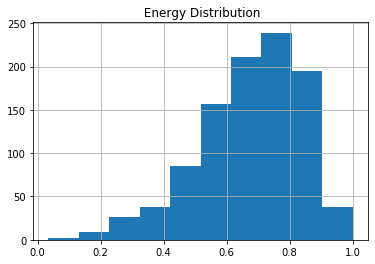

In [10]:
df_audio_features['energy'].hist()
plt.title(' Energy Distribution');

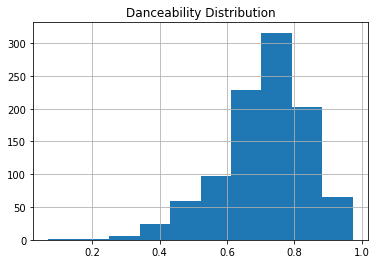

In [11]:
df_audio_features['danceability'].hist()
plt.title('Danceability Distribution');

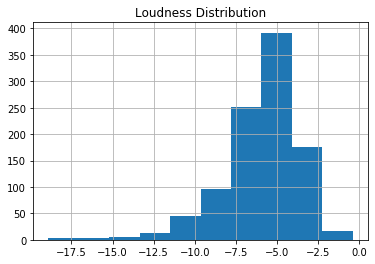

In [12]:
df_audio_features['loudness'].hist()
plt.title('Loudness Distribution');

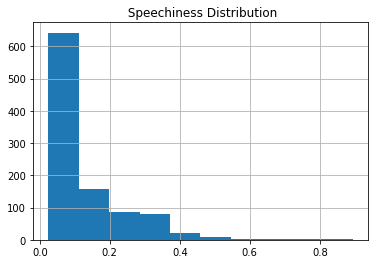

In [13]:
df_audio_features['speechiness'].hist()
plt.title(' Speechiness Distribution');

In [14]:
df_tracks.head()

,artist_name,track_name,track_id,popularity
0,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,98
1,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,100
2,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,95
3,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,95
4,Internet Money,Lemonade,02kDW379Yfd5PzW5A6vuGt,94


In [15]:
import pandas as pd
track_dataframe = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'popularity' : popularity})
print(track_dataframe.shape)
track_dataframe.head()

(1000, 4)


,artist_name,track_name,track_id,popularity
0,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,98
1,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,100
2,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,95
3,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,95
4,Internet Money,Lemonade,02kDW379Yfd5PzW5A6vuGt,94


In [16]:
#  {
#  "duration_ms" : 255349,
#   "key" : 5,
#   "mode" : 0,
#   "time_signature" : 4,
#   "acousticness" : 0.514,
#   "danceability" : 0.735,
#   "energy" : 0.578,
#   "instrumentalness" : 0.0902,
#   "liveness" : 0.159,
#   "loudness" : -11.840,
#   "speechiness" : 0.0461,
#   "valence" : 0.624,
#   "tempo" : 98.002,
#   "id" : "06AKEBrKUckW0KREUWRnvT",
#   "uri" : "spotify:track:06AKEBrKUckW0KREUWRnvT",
#   "track_href" : "https://api.spotify.com/v1/tracks/06AKEBrKUckW0KREUWRnvT",
#   "analysis_url" : "https://api.spotify.com/v1/audio-analysis/06AKEBrKUckW0KREUWRnvT",
#   "type" : "audio_features"
# }

In [17]:
df = track_dataframe

In [18]:
df.head()

,artist_name,track_name,track_id,popularity
0,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,98
1,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,100
2,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,95
3,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,95
4,Internet Money,Lemonade,02kDW379Yfd5PzW5A6vuGt,94


In [19]:
df['artist_name'].value_counts()

J Balvin                      105
Daddy Yankee                  101
KAROL G                        86
Justin Bieber                  27
Pop Smoke                      26
Joji                           21
Lady Gaga                      21
Juice WRLD                     20
Maroon 5                       18
Taylor Swift                   16
21 Savage                      15
Bad Bunny                      13
Machine Gun Kelly              13
Polo G                         11
BLACKPINK                       9
Imagine Dragons                 9
The Kid LAROI                   9
Lil Uzi Vert                    8
Anuel AA                        8
Lil Baby                        8
Bryson Tiller                   8
Jason Derulo                    8
Dua Lipa                        7
Lewis Capaldi                   6
Travis Scott                    6
Marshmello                      6
Internet Money                  6
The Weeknd                      6
YoungBoy Never Broke Again      6
Drake         

In [20]:
pop_rank = df.groupby('artist_name').agg({'popularity':'mean'}).reset_index()

In [21]:
pop_rank.sort_values(by = 'popularity',ascending=False)

,artist_name,popularity
3,24kGoldn,100.000000
50,Cardi B,98.000000
120,Joel Corry,94.000000
114,Jay Wheeler,93.000000
66,DJ Khaled,91.000000
200,Powfu,91.000000
225,Sech,90.500000
20,Ariana Grande,90.000000
54,Chris Brown,90.000000
85,Farruko,90.000000


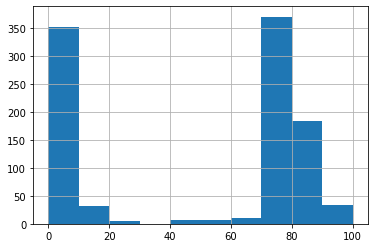

In [22]:
df['popularity'].hist()